<h2>IS453 Financial Analytics</h2><h2>Week 7 - Loan History Exploratory Data Analysis (EDA)</h2>

## HMEQ Dataset

The HMEQ data set reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. 
The data was originally taken from the Credit Risk Analytics: "Measurement Techniques, Applications, and Examples in SAS", book website - https://www.bartbaesens.com/book/6/credit-risk-analytics.
A cleaner version of the data is available in Kaggle - https://www.kaggle.com/akhil14shukla/loan-defaulter-prediction/data


**Variables definition**

1. BAD: Binary response variable
    - 1 = applicant defaulted on loan or seriously delinquent; 
    - 0 = applicant paid loan or customer is current on loan payments. This is the class column.
2. LOAN: Requested loan amount
3. MORTDUE: Amount due on existing mortgage
4. VALUE: Value of current property
5. REASON: 
    - DebtCon = debt consolidation(customer uses home equity loan to pay back high interest loans)
    - HomeImp = home improvement
6. JOB: Occupational categories
    - ProfExe
    - Mgr
    - Office
    - Self
    - Sales
    - Other
7. YOJ: Years at present job
8. DEROG: Number of major derogatory reports(issued for loans taken in the past when customer fails to keep up the contract or payback on time).
9. DELINQ: Number of delinquent credit lines
10. CLAGE: Age of oldest credit line in months
11. NINQ: Number of recent credit inquiries
12. CLNO: Number of credit lines
13. DEBTINC: Debt-to-income ratio in percent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# if you get errors seaborn try upgrading and restart notebook afterward
# !pip install --upgrade seaborn

## 1. Data Examination (EDA)

Import and examine the home equity loan dataset

In [2]:
# sample code

hmeq_data = pd.read_csv('hmeq_data.csv')

hmeq_data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


**Exercise Q1**

Based on the variable definitions:
- Which variables are numeric and which are categorical? 
- Which variables are time-based and what units are they measured?
- Do any of the variables logically seem like they might be closely correlated to one another?

Numeric - loan, mortdue, value, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC

Categorical - reason, job

time based - YOJ (in years)

closely correlated - NINQ and CLNO

Your answer here

## 2. Univariate analysis
Review data characteristics and summary statistics

In [3]:
# sample code

# review data counts and types
hmeq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [4]:
# sample code

# review summary statistics
hmeq_data.describe(include = 'all')


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


### Examine distributions

Examine histograms and boxplots of numeric variables

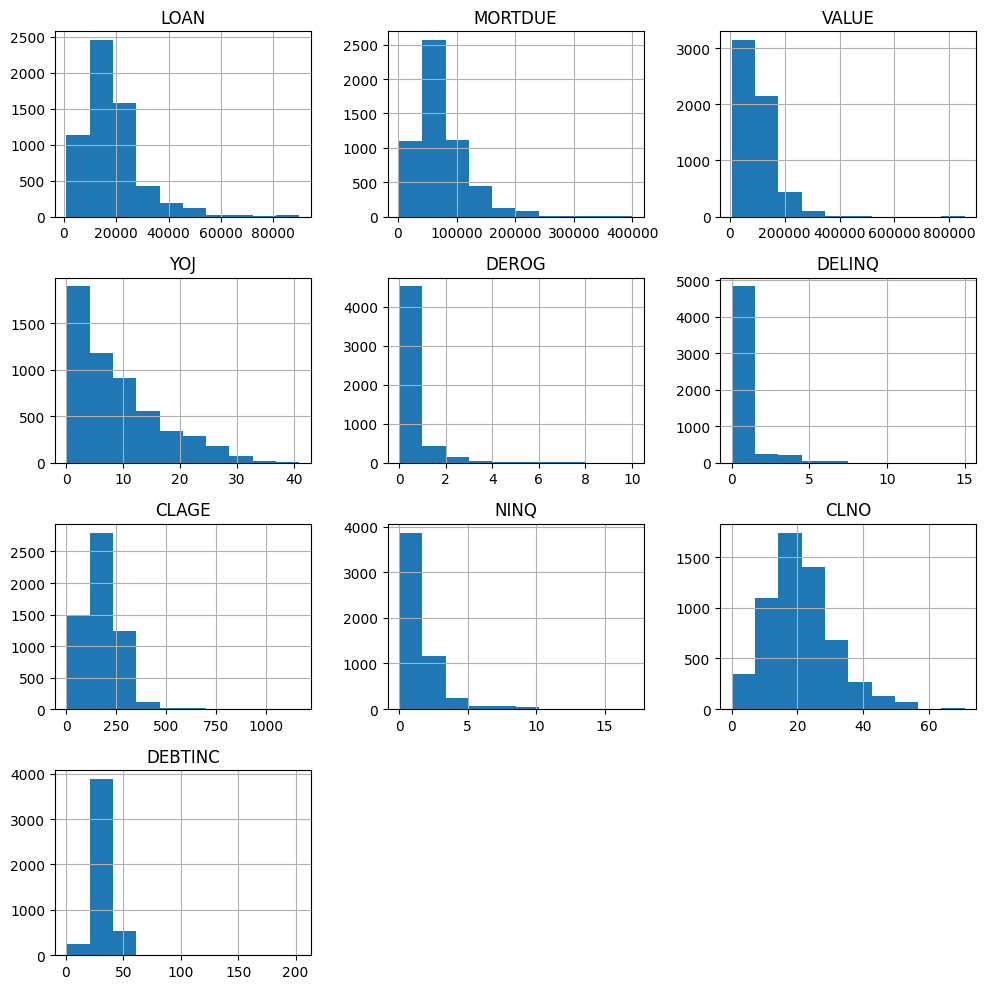

In [5]:
# sample code

# examine the distirbution of the numeric variables
numeric_var = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG','DELINQ','CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

hmeq_data[numeric_var].hist(figsize=(10,10))
plt.tight_layout()

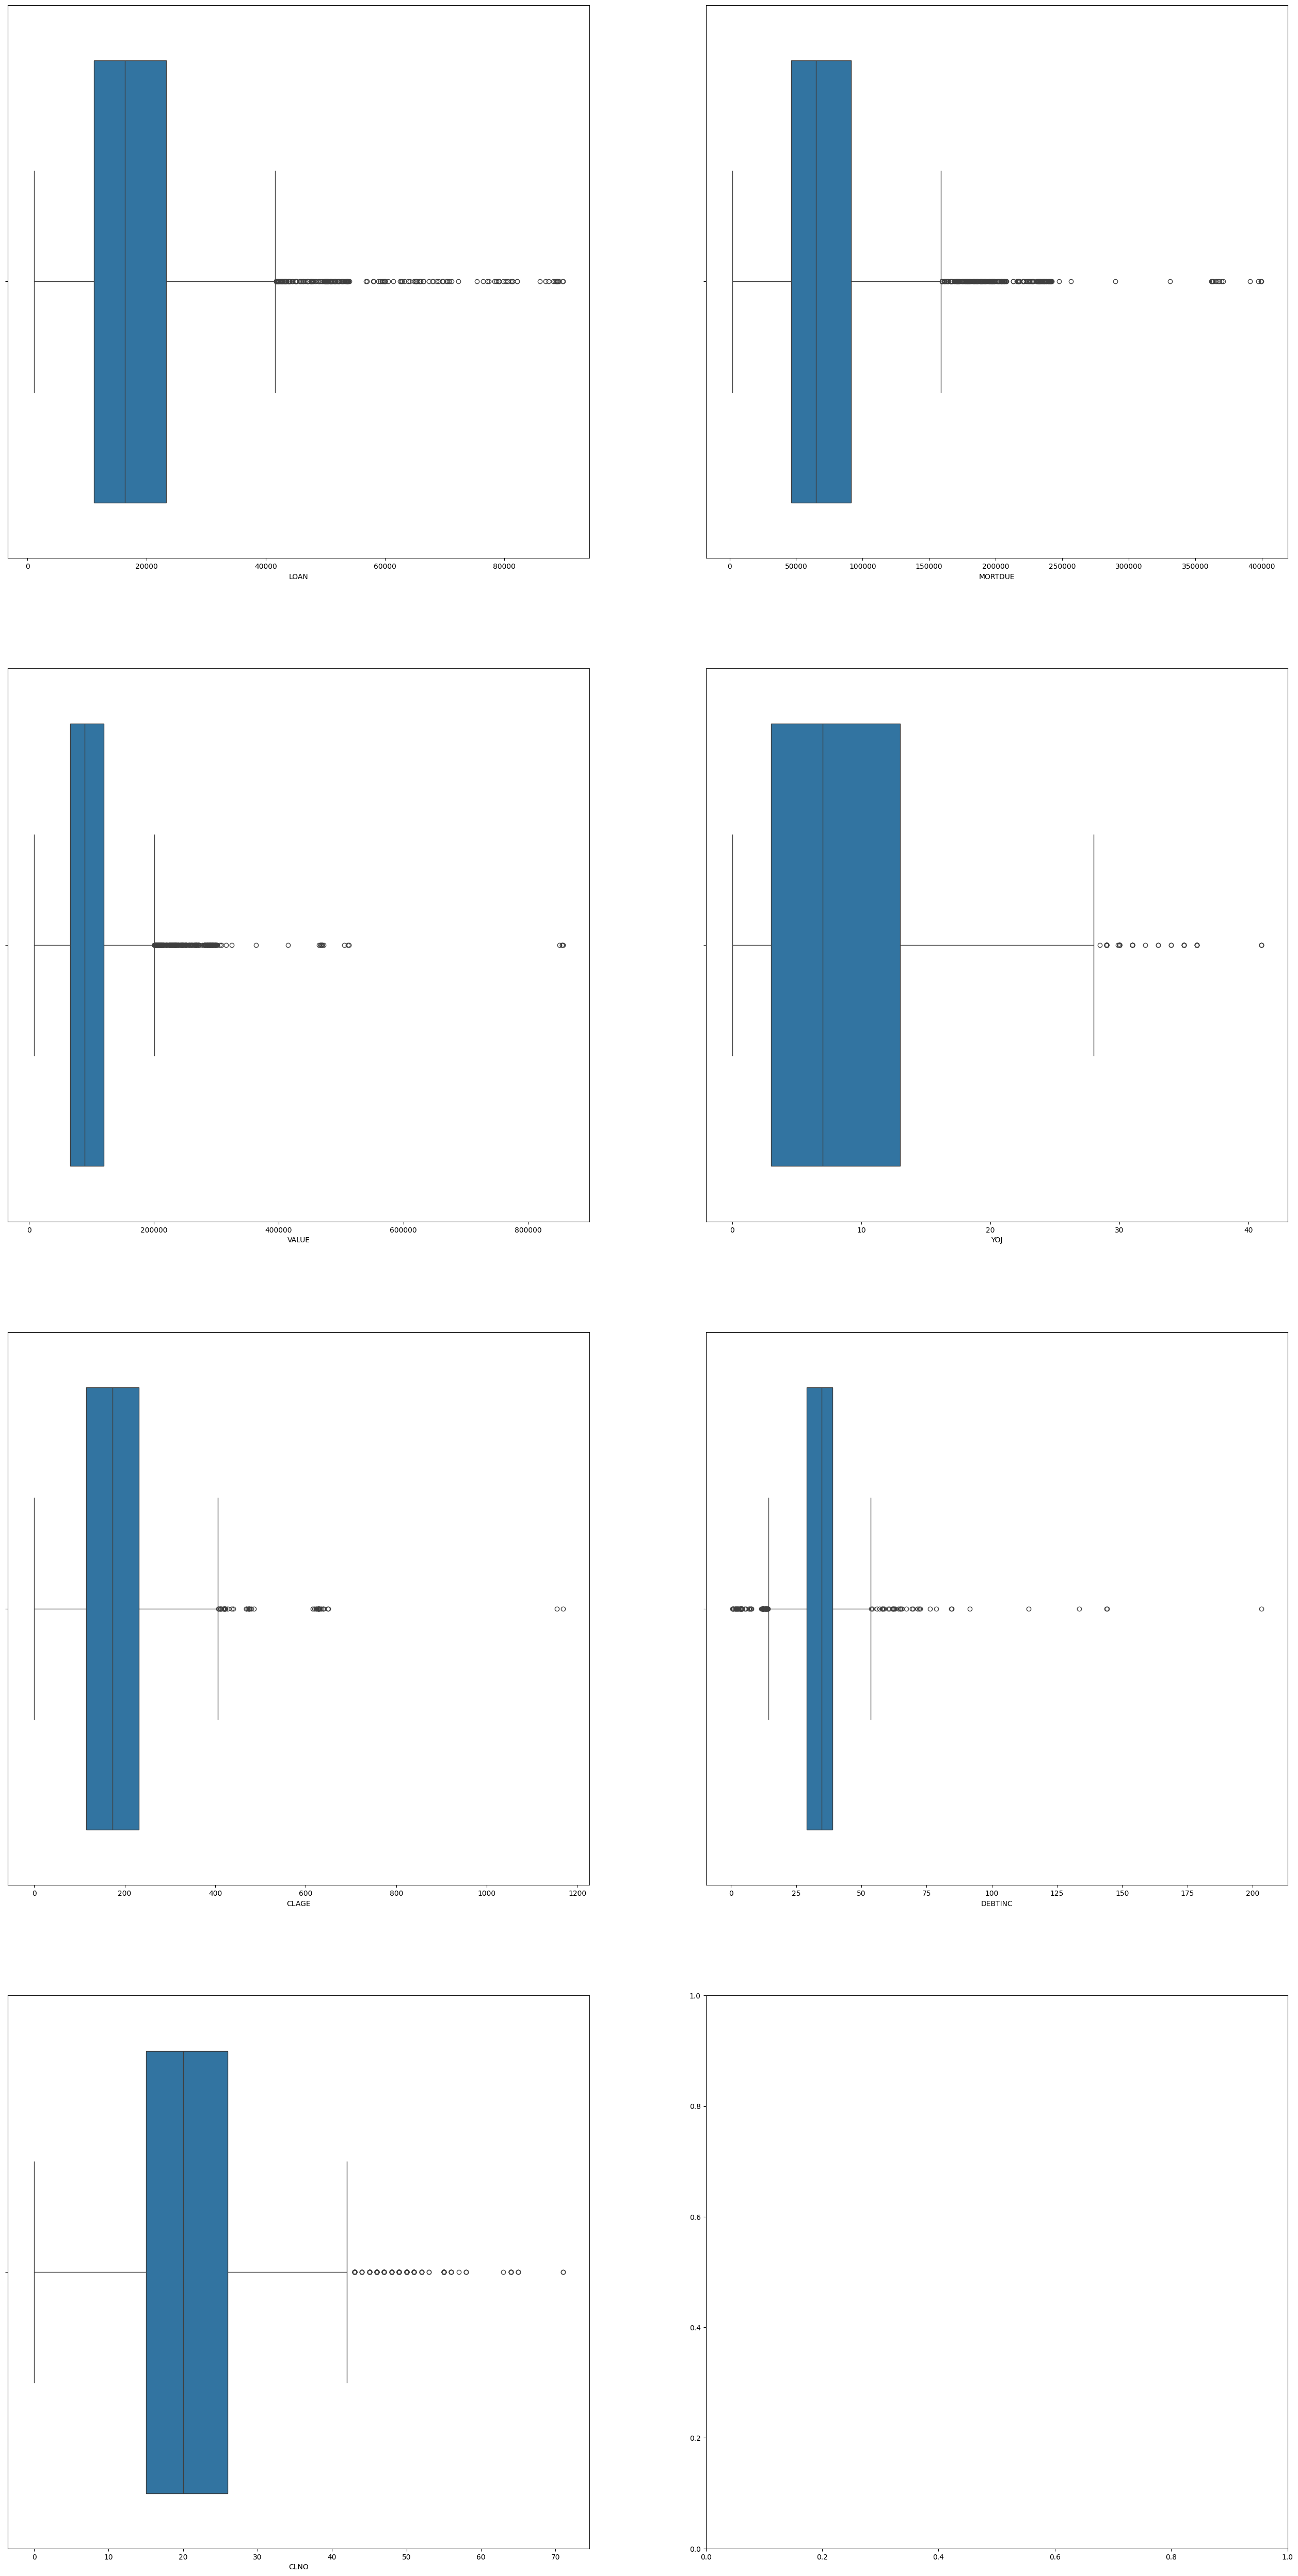

In [6]:
# sample code

# create boxplots
large_val_numeric_var = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'DEBTINC', 'CLNO']

row_count=int(np.ceil(len(large_val_numeric_var)/2))

# create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=hmeq_data[large_val_numeric_var[i]],orient='h')
    axis.set_xlabel(str(large_val_numeric_var[i]))
    if i == len(large_val_numeric_var)-1: 
         break
    
# Show the plot
plt.show()


**Exercise Q2**
- Which of the variables appear to have the partial shape of a normal distribution, i.e. with a peak in the middle? Are they skewed to the left or right?  
- Which variables start high and then slope downwards?
- Do any variables have outlier values that seem inconsistent with their definitions?

Your answer here

normal distribution - CLNO (right), MORTDUE (right), LOAN (right)

start high, slope downwards - VALUE, YOJ, CLAGE

inconsistent - CLAGE (it has an outlier of 1200)

**Examine bar charts of categorical and low-value numeric variables**

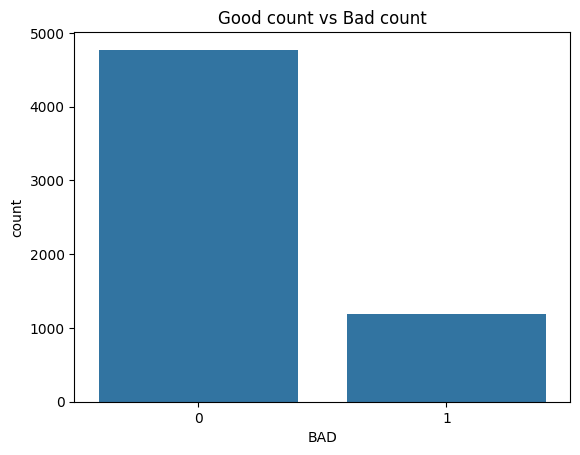

In [7]:
# sample code

# plot the goods vs bads
sns.countplot(x = hmeq_data['BAD'])
ax = plt.title('Good count vs Bad count')

Follow the same steps to create plots for the other categorical and low-value numeric varibles

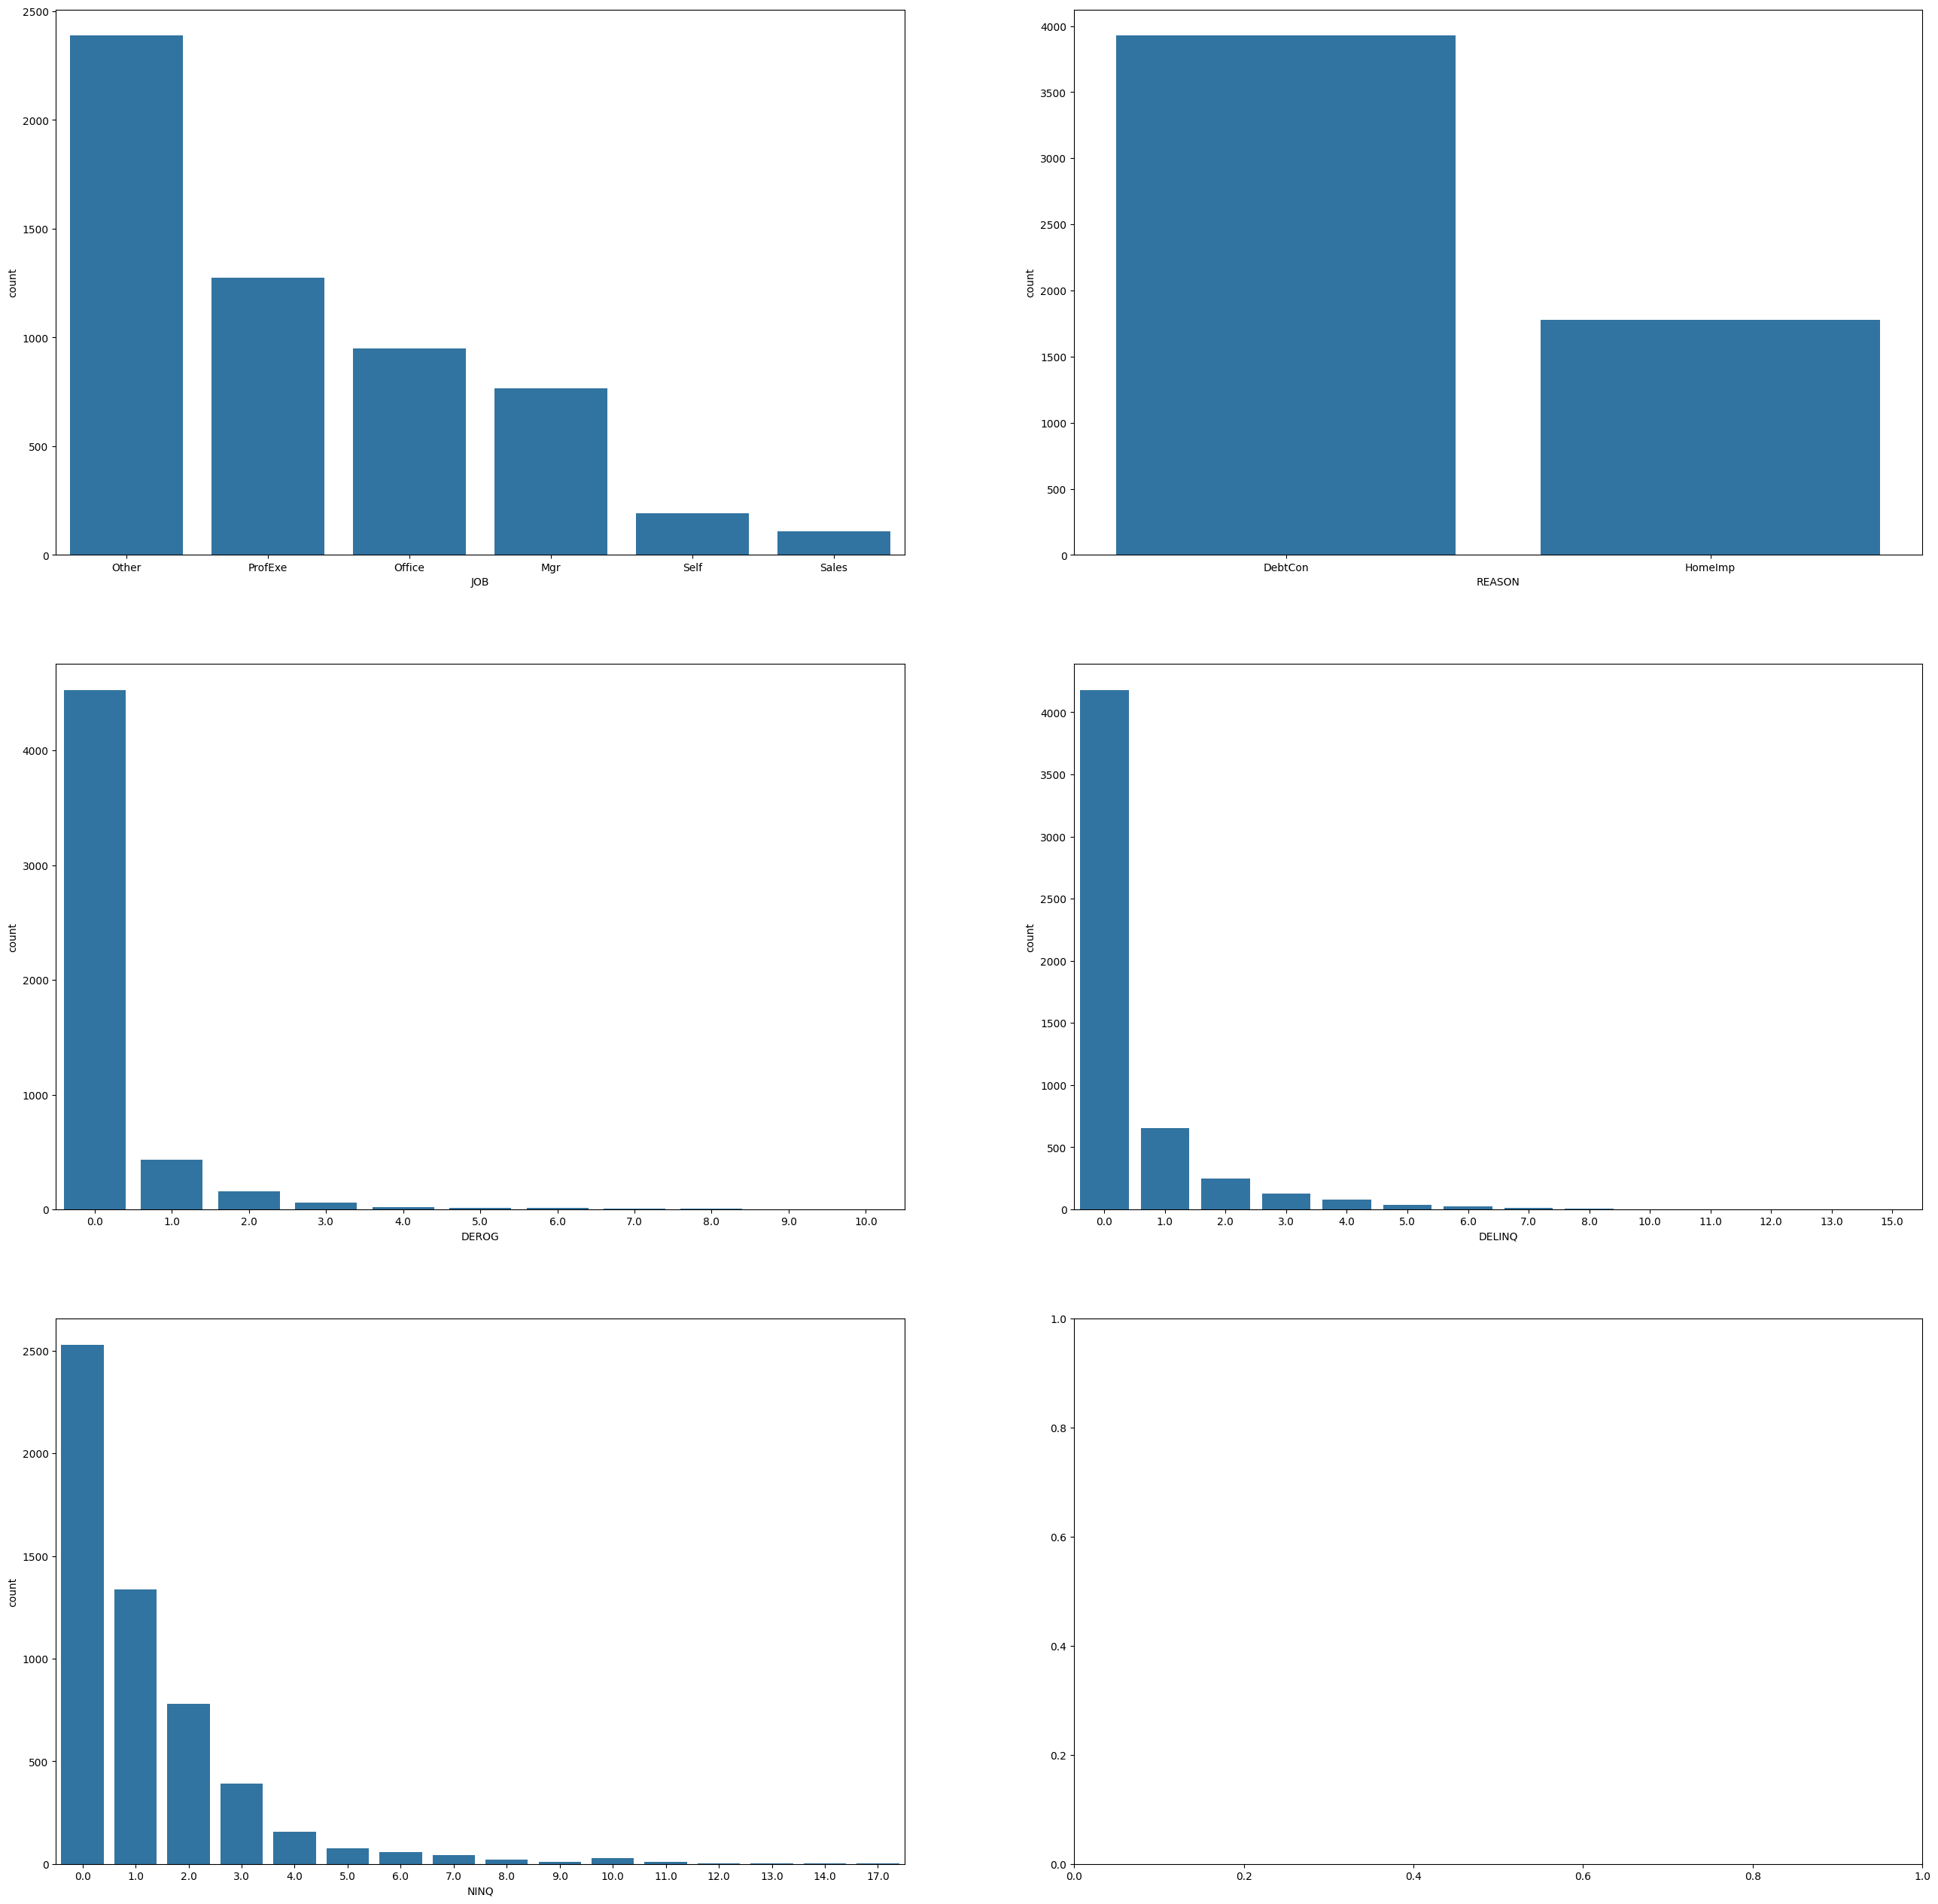

In [8]:
# sample code 

cat_low_val_num_var = ['JOB','REASON','DEROG','DELINQ','NINQ']

# create the figure and subplots
row_count=int(np.ceil(len(cat_low_val_num_var)/2))
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 32))

for i, axis in enumerate(fig.axes):
    # show in decending order if categoridal
    if hmeq_data[cat_low_val_num_var[i]].dtype == 'O':
        sns.countplot(ax=axis, x = hmeq_data[cat_low_val_num_var[i]], order=hmeq_data[cat_low_val_num_var[i]].value_counts(ascending=False).index)
    else:
      sns.countplot(ax=axis, x = hmeq_data[cat_low_val_num_var[i]])
    axis.set_xlabel(str(cat_low_val_num_var[i]))
    if i == len(cat_low_val_num_var)-1: 
         break
    
# Show the plot
plt.show()


## 2. Bivariate analysis
Analyse continuous variables using KDE plots

Text(0.5, 1.0, 'Distribution of Loan amount by Default Rate')

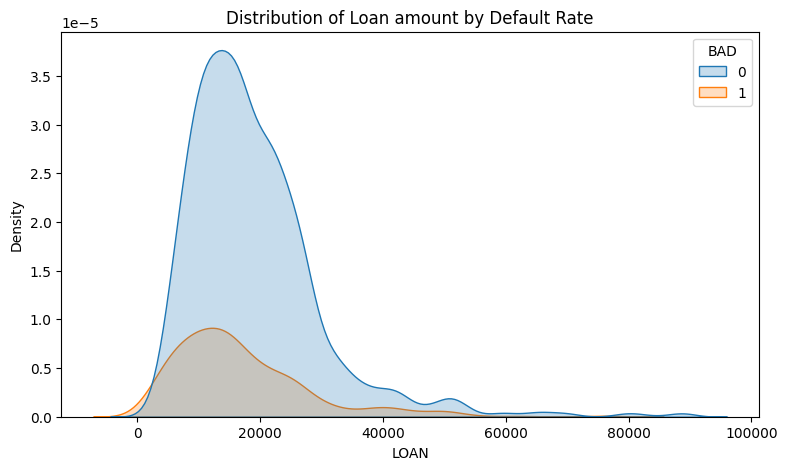

In [9]:
# sample code

plt.figure(figsize=(9,5))
sns.kdeplot(data=hmeq_data, x="LOAN", hue="BAD", fill = True)
plt.title('Distribution of Loan amount by Default Rate')

Follow the same steps to create plots for the large numeric variables

Text(0.5, 1.0, 'Distribution of Loan amount by Default Rate')

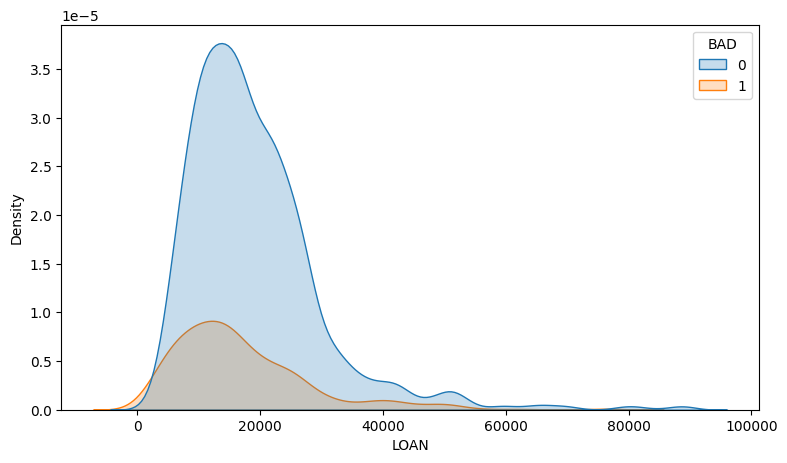

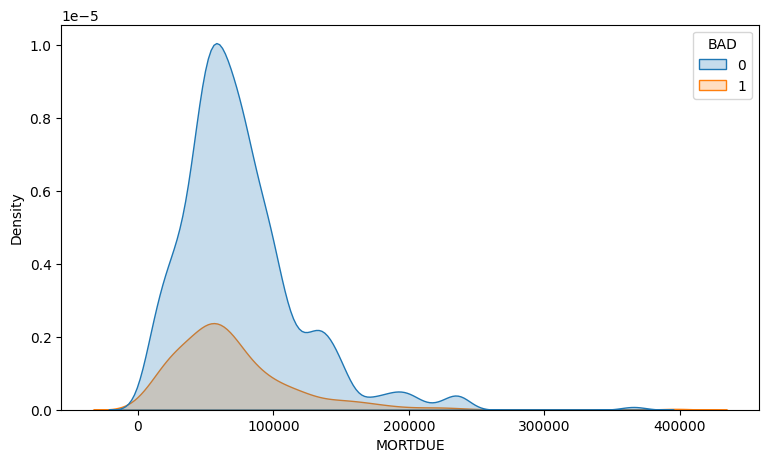

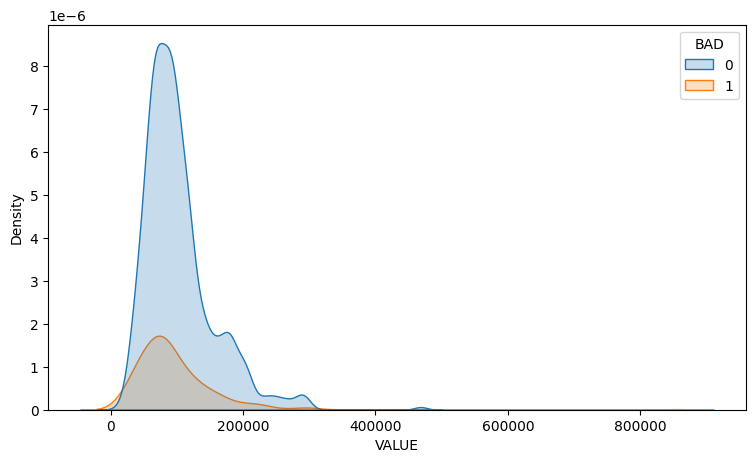

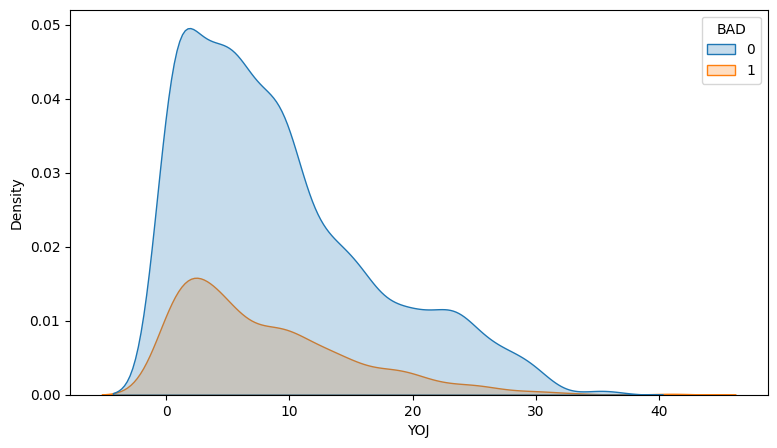

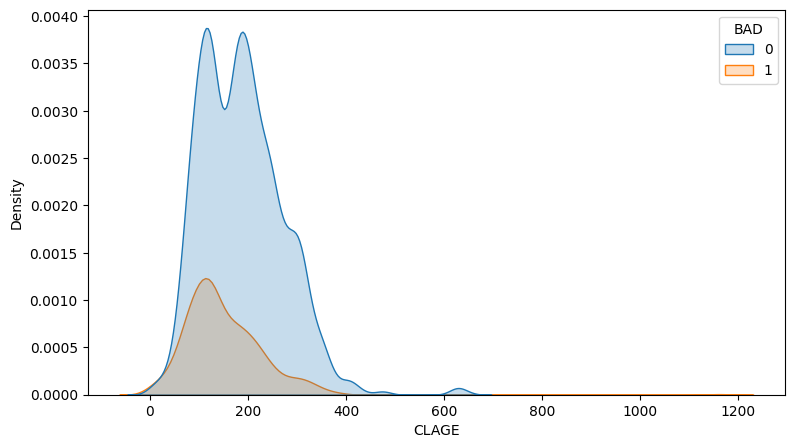

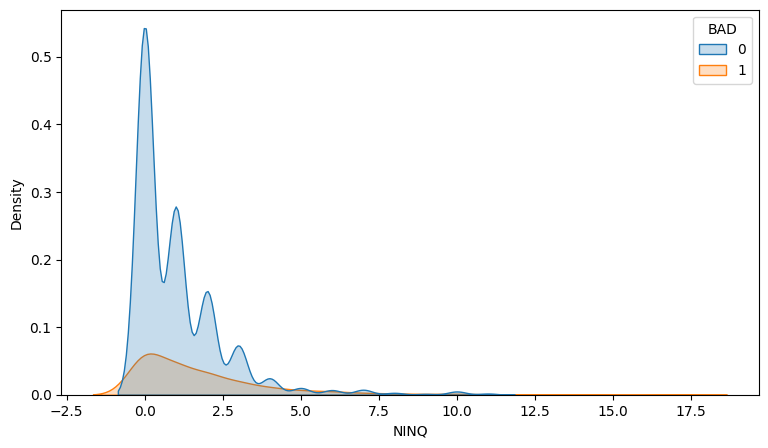

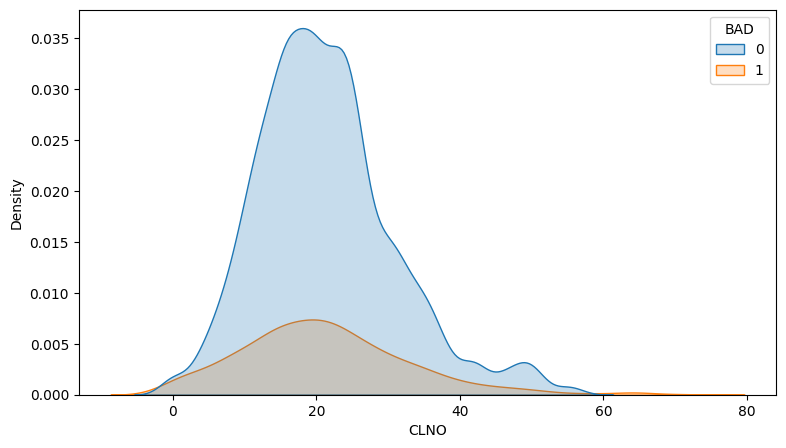

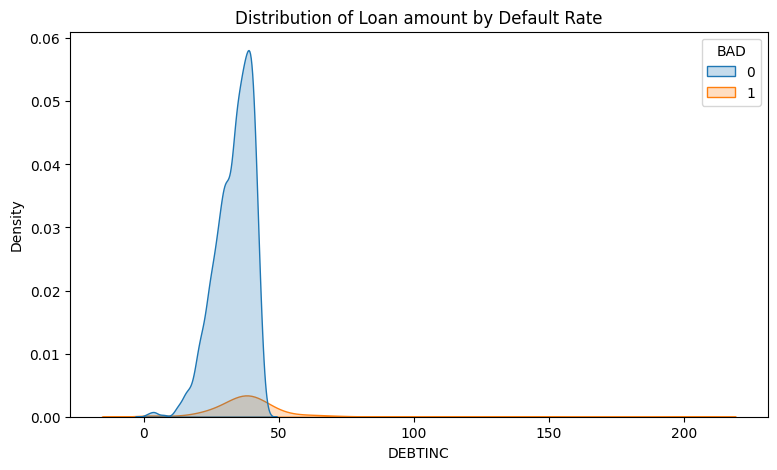

In [10]:
# sample code

cat_large_val_num_var = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

for i, var in enumerate(cat_large_val_num_var):
    plt.figure(figsize=(9,5))
    sns.kdeplot(data=hmeq_data, x=var, hue="BAD", fill = True)
plt.title('Distribution of Loan amount by Default Rate')

**Analyse categorical variables using bar charts**

Text(0.5, 1.0, 'Defaults by Reason')

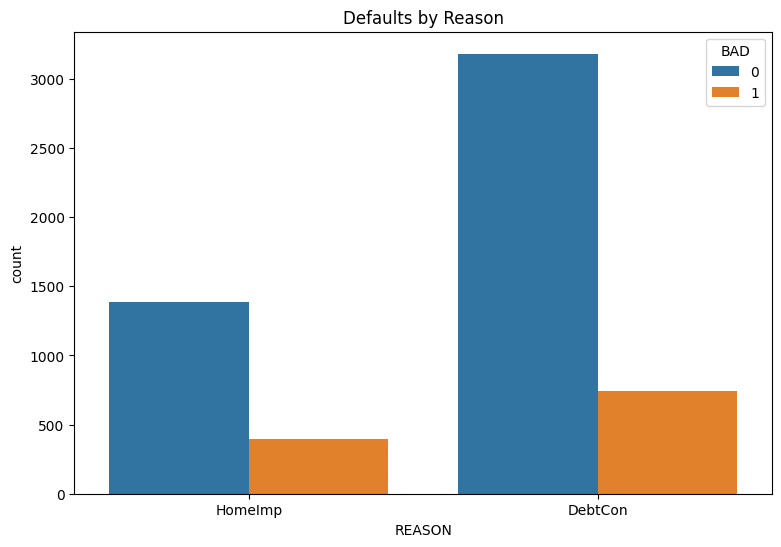

In [11]:
# sample code

# goods vs bads by variable for JOB type
plt.figure(figsize=(9,6))
ax = sns.countplot(x= hmeq_data['REASON'], hue=hmeq_data['BAD'])
plt.title('Defaults by Reason')


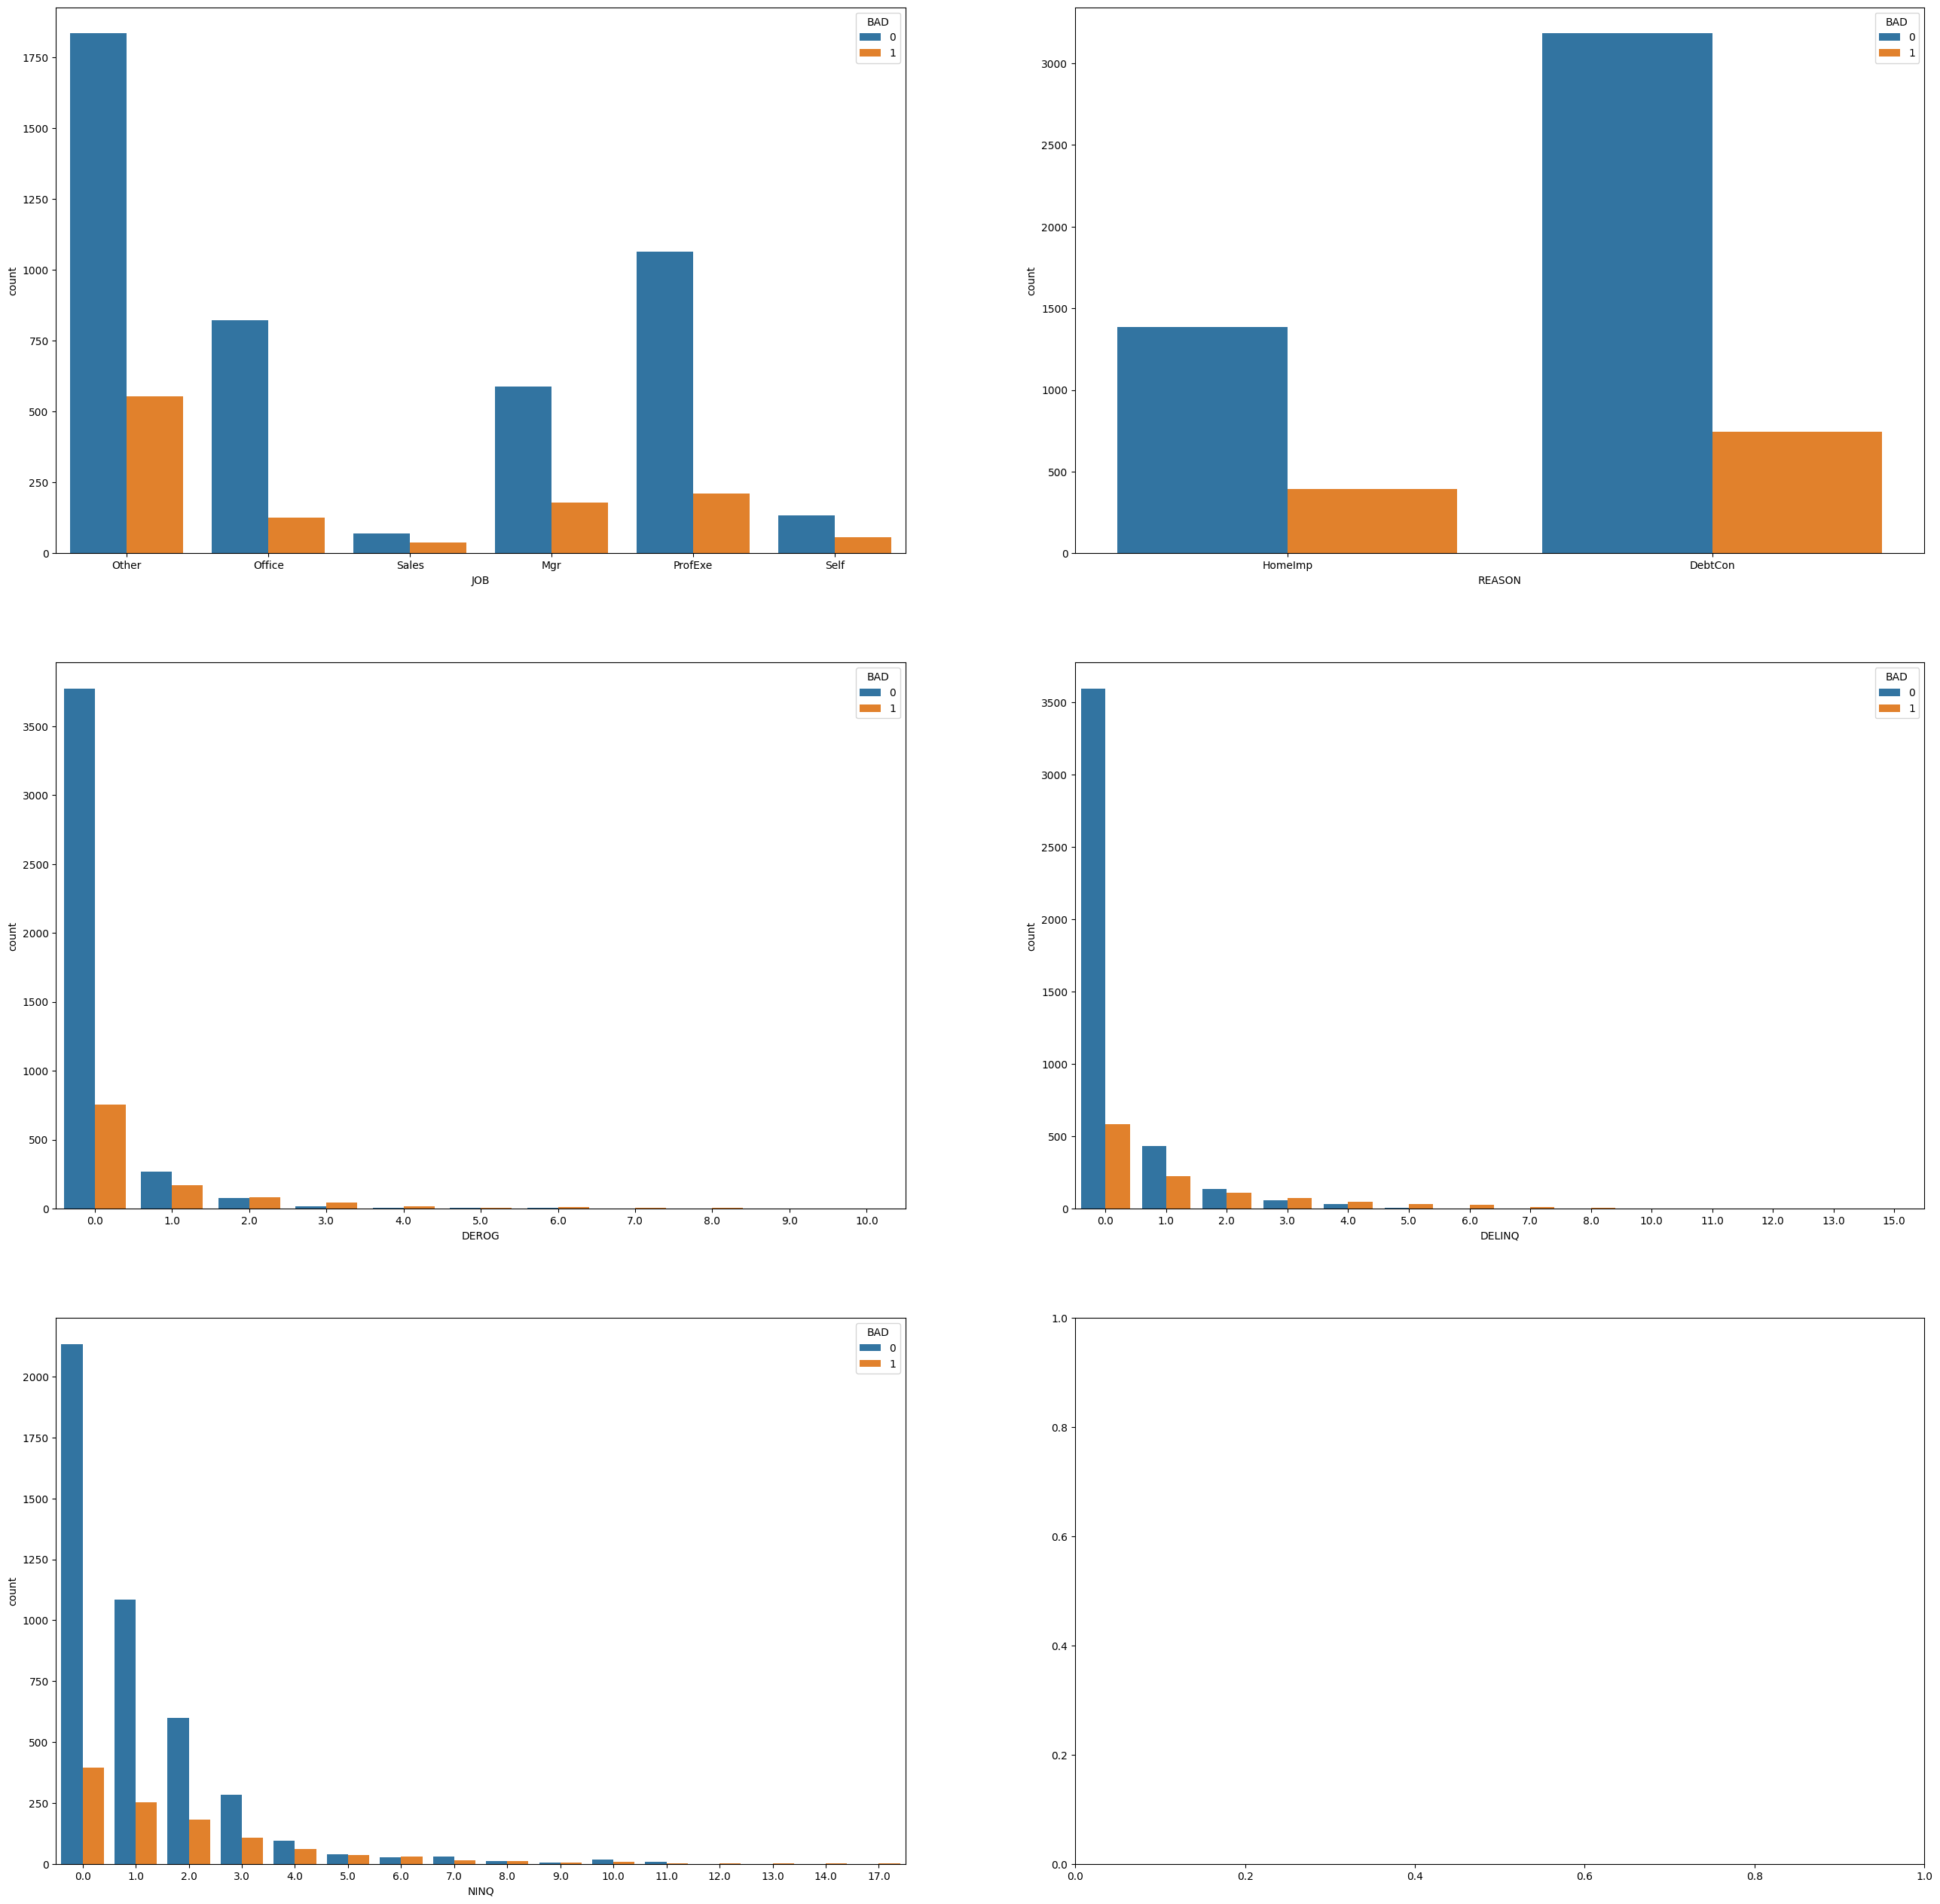

In [12]:
# sample code

# create regular bar plots of good/bad distribution for the other categorical and low value numeric variables
cat_low_val_num_var = ['JOB','REASON','DEROG','DELINQ','NINQ']

# create the figure and subplots
row_count=int(np.ceil(len(cat_low_val_num_var)/2))
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 32))

for i, axis in enumerate(fig.axes):
    sns.countplot(ax=axis, x= hmeq_data[cat_low_val_num_var[i]], hue=hmeq_data['BAD'])
    axis.set_xlabel(str(cat_low_val_num_var[i]))
    if i == len(cat_low_val_num_var)-1: 
         break
    
# Show the plot
plt.show()

Use .groupby() to compare the relative percentage amounts between values.

In [13]:
# sample code

# univariate BAD data
print('Total BAD counts:')
print(hmeq_data['BAD'].value_counts())

# univariate REASON data
print('\nTotal REASON counts:')
print(hmeq_data['REASON'].value_counts())

# bivariate REASON-BAD data
print('\nTotal BAD by REASON counts:')
print(hmeq_data.groupby('REASON')['BAD'].value_counts())

print('\nTotal BAD by REASON percentages:')
print(hmeq_data.groupby('REASON')['BAD'].value_counts(normalize = True))

# convert to a dataframe with BAD values as columns
df_reason_bivariate = hmeq_data.groupby('REASON')['BAD'].value_counts(normalize = True).unstack()
print('\nUnstacked dataframe:')
print(df_reason_bivariate)

Total BAD counts:
0    4771
1    1189
Name: BAD, dtype: int64

Total REASON counts:
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

Total BAD by REASON counts:
REASON   BAD
DebtCon  0      3183
         1       745
HomeImp  0      1384
         1       396
Name: BAD, dtype: int64

Total BAD by REASON percentages:
REASON   BAD
DebtCon  0      0.810336
         1      0.189664
HomeImp  0      0.777528
         1      0.222472
Name: BAD, dtype: float64

Unstacked dataframe:
BAD             0         1
REASON                     
DebtCon  0.810336  0.189664
HomeImp  0.777528  0.222472


Plot normalised bivariate dataframe as stacked bar chart

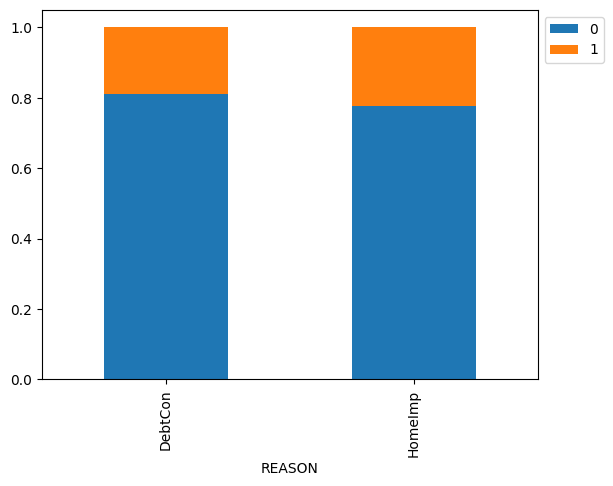

In [14]:
# sample code

# plot a percent stacked bar chart for bivariate analysis
ax = df_reason_bivariate.plot(kind='bar', stacked='True')
#place legend outside the chart
ax.legend(bbox_to_anchor=(1.0, 1.0))

Follow the same steps to create stacked bar plots of good/bad distribution for the other categorical and low value numeric variables

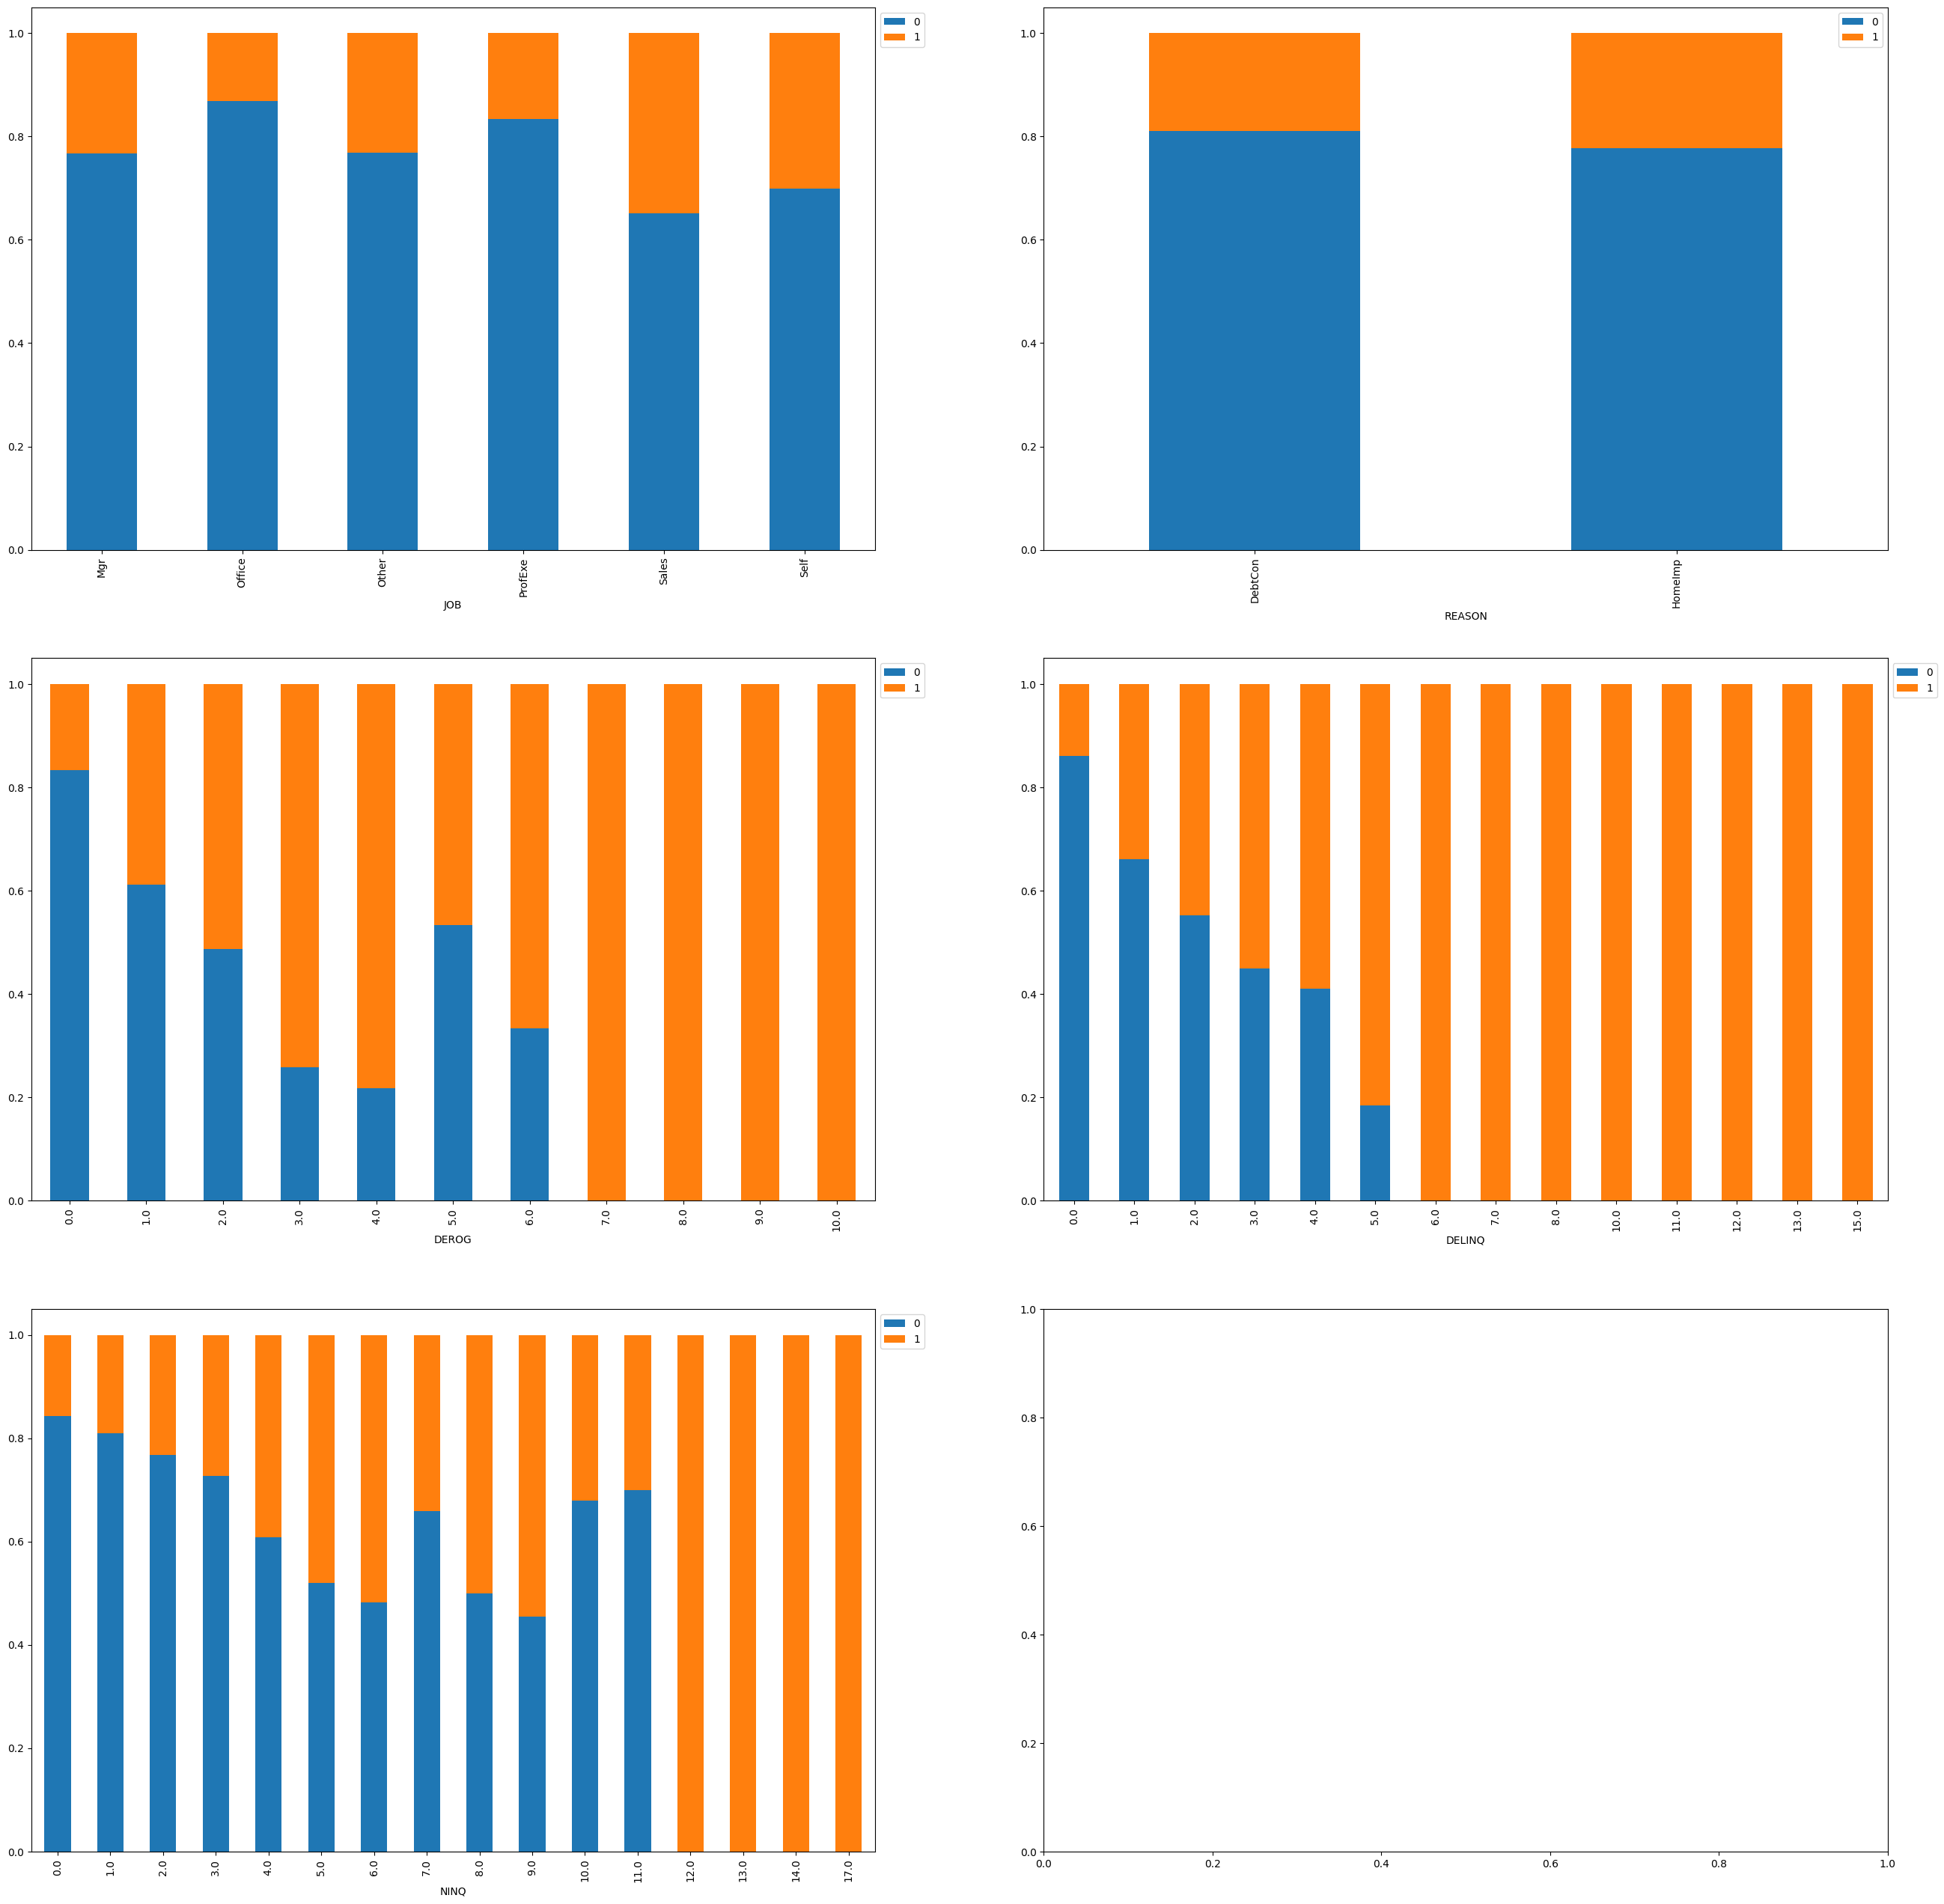

In [15]:
# sample code

cat_low_val_num_var = ['JOB','REASON','DEROG','DELINQ','NINQ']

# create the figure and subplots
row_count=int(np.ceil(len(cat_low_val_num_var)/2))
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 32))

for i, axis in enumerate(fig.axes):
    df_bivariate = hmeq_data.groupby(cat_low_val_num_var[i])['BAD'].value_counts(normalize = True).unstack()
    df_bivariate.plot(ax=axis, kind='bar', stacked='True')
    axis.set_xlabel(str(cat_low_val_num_var[i]))
    axis.legend(bbox_to_anchor=(1.0, 1.0))
    if i == len(cat_low_val_num_var)-1: 
         break
    
# Show the plot
plt.show()

**Exercise Q3**
- Which two job types have the highest default rate?
- What ranges for the numeric variables DEROG, DELINQ, and NINQ have all BAD values? 

Your answer here

- Sales and Self 
- DEFROG >= 7.0
- DELINQ >= 6.0
- NINQ >= 12.0

# Lab DYI

**DYI Q1: Identify ranges with all GOODs or BADs**
- Based on visual inspection, what ranges for the large numeric variables plotted with KDE charts appear to have only GOOD or BAD values, but not both? 

Your answer here

- LOAN - only good > 60000 
- DEBTINC - only bad > 50 
- CLNO - only bad > 60
- NINQ - only bad > 12.5

**DYI Q2: Analyse numerical variables using correlation matrix and heat map**
- Which variables have correlation greater than 0.5? 
- What is their correlation to 3 decimal places?
- What could logically explain that relationship?

<Axes: >

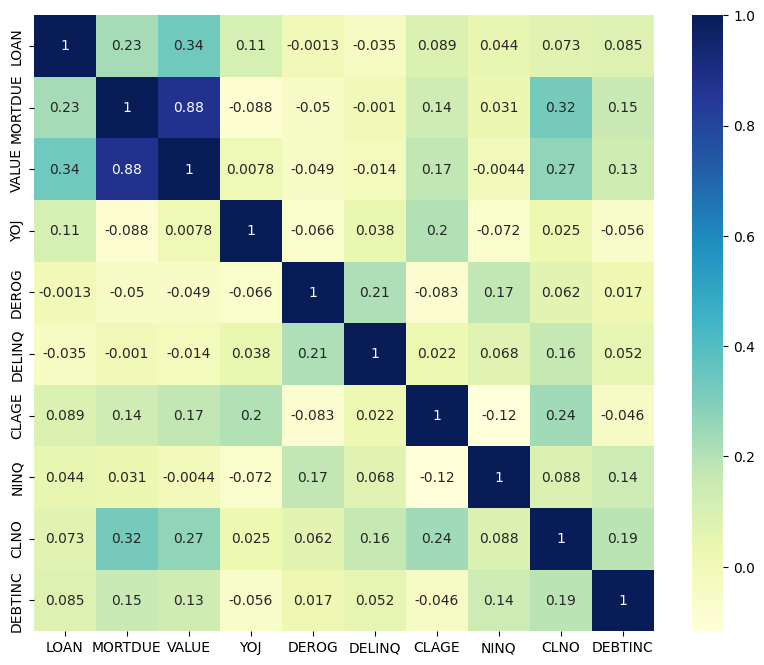

In [16]:
# sample code 

# generate correlation maxtrix
cor = hmeq_data[numeric_var].corr()

# plot heat map
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu", ax=ax)

In [ ]:
# your code here
high_correlation_pairs = cor[(cor > 0.5) & (cor < 1.0)] # to find correlation pairs > 0.5

# Convert to long format and drop NaN values
high_correlation_pairs = high_correlation_pairs.stack().reset_index()
high_correlation_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_correlation_pairs['Correlation'] = high_correlation_pairs['Correlation'].round(3)

# Display correlations
print(high_correlation_pairs)

  Variable 1 Variable 2  Correlation
0    MORTDUE      VALUE        0.876
1      VALUE    MORTDUE        0.876


Your answer here

MORTDUE and VALUE has a correlation greater than 0.5 at 0.876
- as the value of the property increases, the mortgage due also increases
- this means that higher property values typically requires higher mortgage due amounts

**DYI Q3: Identify missing values**

Examine rows and columns for missing data
- How many rows have more than 3 missing values?  What percentage of total rows is that?
- Which four columns have the greatest number of missing values? What percent are missing for each of them? 

In [18]:
# sample code

print('Columns missing values:')
print(hmeq_data.isnull().sum())

print('\nRows with more than one missing value:')
hmeq_data[hmeq_data.isnull().sum(axis=1) > 1]

Columns missing values:
BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

Rows with more than one missing value:


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN
10,1,2000,22608.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
13,0,2000,64536.0,87400.0,NaN,Mgr,2.5,0.0,0.0,147.133333,0.0,24.0,NaN
15,1,2200,24280.0,34687.0,HomeImp,Other,NaN,0.0,1.0,300.866667,0.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,0,53700,NaN,84205.0,HomeImp,Other,NaN,0.0,0.0,339.665615,0.0,7.0,22.63994
5884,0,53900,NaN,91309.0,HomeImp,Other,NaN,0.0,0.0,349.795748,0.0,6.0,22.06133
5900,1,61400,46126.0,83800.0,NaN,Other,33.0,0.0,1.0,339.900000,1.0,23.0,NaN
5930,1,72300,NaN,85000.0,DebtCon,Other,1.0,0.0,0.0,117.166667,9.0,23.0,NaN


In [25]:
# your code here
# Count missing values per row
rows_missing_3plus = hmeq_data.isnull().sum(axis=1) > 3

# Total number of such rows
num_rows_missing_3plus = rows_missing_3plus.sum()

# Percentage of total rows
total_rows = len(hmeq_data)
percent_rows_missing_3plus = (num_rows_missing_3plus / total_rows) * 100

print(f"Number of rows with more than 3 missing values: {num_rows_missing_3plus}")
print(f"Percentage of total rows: {percent_rows_missing_3plus:.2f}%")

Number of rows with more than 3 missing values: 339
Percentage of total rows: 5.69%


In [28]:
# Count missing values per column
missing_per_column = hmeq_data.isnull().sum()

# Sort columns by number of missing values in descending order
top_missing_columns = missing_per_column.sort_values(ascending=False).head(4)

# Calculate percentage missing for each of the top columns
percent_missing = (top_missing_columns / total_rows) * 100

print("Top 4 columns with the most missing values:")
print(top_missing_columns)
print("\nPercentage missing for each:")
print(percent_missing.round(2))

Top 4 columns with the most missing values:
DEBTINC    1267
DEROG       708
DELINQ      580
MORTDUE     518
dtype: int64

Percentage missing for each:
DEBTINC    21.26
DEROG      11.88
DELINQ      9.73
MORTDUE     8.69
dtype: float64


Number of rows with more than 3 missing values: 339

Percentage of total rows: 5.69%

Top 4 columns with the most missing values:

DEBTINC - 1267 (21.26%)

DEROG -  708 (11.88%)

DELINQ - 580 (9.73%)

MORTDUE -  518 (8.69%)


# Group Assignment Preparation
Unpack the file "IS453 Group Assignment - Data.zip"<BR>
Based on the data files and data dictionary, answer the DYI questions below.

**DYI Q4: Identify missing values**
- How many rows and column in each data file?
- Through which variable is the data in two files linked?
- Is the relationship between the records in the files one-to-one or one-to-many? In which direction?
- Are all of the records in each file linked to the other? If not, which file has unlinked records?
- Which variables would potentially conflict with fair lending principles?

Your answer here

In [33]:
app_data = pd.read_csv('IS453 Group Assignment - Data/IS453 Group Assignment - Application Data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
print(app_data.shape)

(307511, 120)


In [36]:
bureau_data = pd.read_csv('IS453 Group Assignment - Data/IS453 Group Assignment - Bureau Data.csv')
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [37]:
print(bureau_data.shape)

(1716428, 17)


Application Data.csv
- rows - 307511
- cols - 120

Bureau Data.csv
- rows - 1716428
- cols - 17

In [47]:
# find common cols
common_columns = set(app_data.columns).intersection(set(bureau_data.columns))
print("Common column(s) linking both files:", common_columns)
print(len(common_columns))

Common column(s) linking both files: {'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'CREDIT_TYPE', 'AMT_CREDIT_SUM_DEBT', 'CREDIT_DAY_OVERDUE', 'DAYS_ENDDATE_FACT', 'CREDIT_CURRENCY', 'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_LIMIT', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY', 'SK_ID_BUREAU', 'SK_ID_CURR', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'CREDIT_ACTIVE'}
17


In [44]:
print("Unique SK_ID_CURRs in application data:", app_data['SK_ID_CURR'].nunique()) 
print("Unique SK_ID_CURRs in bureau data:", bureau_data['SK_ID_CURR'].nunique()) 

if app_data['SK_ID_CURR'].nunique() == len(app_data) and bureau_data['SK_ID_CURR'].nunique() == len(bureau_data):
    print("One-to-One relationship")
elif app_data['SK_ID_CURR'].nunique() < len(app_data) or bureau_data['SK_ID_CURR'].nunique() < len(bureau_data):
    print("One-to-Many relationship")

Unique SK_ID_CURRs in application data: 305811
Unique SK_ID_CURRs in bureau data: 305811
One-to-Many relationship


In [45]:
# Find IDs in one dataset that are missing in the other
missing_in_bureau_data = app_data[~app_data['SK_ID_CURR'].isin(bureau_data['SK_ID_CURR'])]
missing_in_app_data = bureau_data[~bureau_data['SK_ID_CURR'].isin(app_data['SK_ID_CURR'])]

print(f"Records in app_data not found in bureau_data: {len(missing_in_bureau_data)}")
print(f"Records in bureau_data not found in app_data: {len(missing_in_app_data)}")


Records in app_data not found in bureau_data: 0
Records in bureau_data not found in app_data: 0


In [ ]:
for col in common_columns:
    print(f"{col}: Unique values in app_data = {app_data[col].nunique()}, Unique values in bureau_data = {bureau_data[col].nunique()}")

link_col = list(common_columns)[0]  # Select the first common column (adjust manually if needed)

missing_in_bureau_data = app_data[~app_data[link_col].isin(bureau_data[link_col])]
missing_in_app_data = bureau_data[~bureau_data[link_col].isin(app_data[link_col])]

print(f"Records in app_data not found in bureau_data: {len(missing_in_bureau_data)}")
print(f"Records in bureau_data not found in app_data: {len(missing_in_app_data)}")

AMT_CREDIT_MAX_OVERDUE: Unique values in app_data = 68251, Unique values in bureau_data = 68251
CNT_CREDIT_PROLONG: Unique values in app_data = 10, Unique values in bureau_data = 10
CREDIT_TYPE: Unique values in app_data = 15, Unique values in bureau_data = 15
AMT_CREDIT_SUM_DEBT: Unique values in app_data = 226537, Unique values in bureau_data = 226537
CREDIT_DAY_OVERDUE: Unique values in app_data = 942, Unique values in bureau_data = 942
DAYS_ENDDATE_FACT: Unique values in app_data = 2917, Unique values in bureau_data = 2917
CREDIT_CURRENCY: Unique values in app_data = 4, Unique values in bureau_data = 4
DAYS_CREDIT: Unique values in app_data = 2923, Unique values in bureau_data = 2923
AMT_CREDIT_SUM: Unique values in app_data = 236708, Unique values in bureau_data = 236708
AMT_CREDIT_SUM_LIMIT: Unique values in app_data = 51726, Unique values in bureau_data = 51726
DAYS_CREDIT_UPDATE: Unique values in app_data = 2982, Unique values in bureau_data = 2982
AMT_ANNUITY: Unique values in

Bureau data linked to application data, application data has unlinked records

Demographic variables could possibly conflict with fair lending principles, eg. ethnicity, gender, age etc